# Part II - Duration of bike rides of the bike-sharing system in San Francisco Bay area
## by Mobuolafoluwa Onayade





## Investigation Overview

In this investigation, I wanted to explore the factors that affect the duration of bike rides. The main focus was on age and gender of the rider as well time of day and time of week of the bike ride

## Dataset Overview

The dataset consisted of duration and attributes of 183,412 bike rides made in a bike-sharing system covering the greater San Francisco Bay area . The attributes included start and end stations, year of birth and gender of riders, as well as additional measurements such as user type and Bike share for all trip status. New variables such as time of day, weekday and age were created to better explore relationships 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Convert bike ride duration in seconds to minutes 
data['duration_mins'] = round((data.duration_sec)/60)

In [4]:
# Convert start and end time to datetime format so as to be able to extract the time of day the ride was taken 
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

data['time']= data['start_time'].dt.hour
b = [0,6,12,18,24]
l = ['Late Night','Morning','Afternoon','Night']
data['time_of_day'] = pd.cut(data['time'], bins=b, labels=l, include_lowest=True)

def f(x):
    if (x > 6) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 18):
        return'Afternoon'
    elif (x > 18) and (x <= 24):
        return'Night'
    elif (x <= 6):
        return'Late Night'
    
data['time_of_day'] = data['time'].apply(f)

In [5]:
data = data.dropna(subset='member_birth_year')
from datetime import date 

current_year = date.today().year

data['Age'] = current_year - data['member_birth_year']

# Group age into age groups to make it easier to look at the reationship
conds = [
    (data['Age'] >20) & (data['Age'] <= 40), 
    (data['Age'] > 40) & (data['Age'] <=60),
    (data['Age'] > 60),
]
choices = ['20 - 40', '40 - 60', '>60']
data['Age_Group'] = np.select(conds, choices)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Duration of Bike Rides

Duration of bike rides in the dataset take on a very large range of values, from about 1 minute at the lowest, to about 1424 at the highest. Plotted with a limit of 60 minutes the distribution is right skewed. There is a steady decline in the number of bike rides taken for more than 10 minutes  

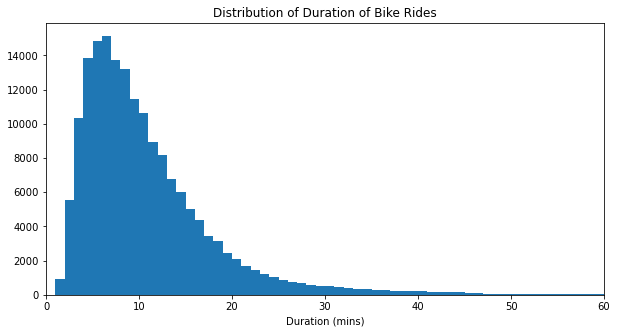

In [6]:
plt.figure(figsize=(10, 5))
bin_edges = np.arange(0, data['duration_mins'].max()+10, 1)
plt.hist(data=data, x='duration_mins', bins = bin_edges)
plt.xlabel('Duration (mins)')
plt.title('Distribution of Duration of Bike Rides')
plt.xlim(0, 60);

## Duration of bike rides vs Time of day

Plotting the duration of bike rides and time of the day of the ride shows that there is a relationship between the time of the day a trip is taken and how long it lasts for. Bike rides taken during the day are most longer than those taken at night.

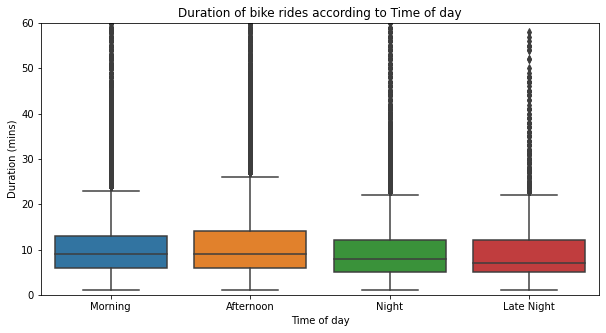

In [7]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=data, x='time_of_day', y='duration_mins', order=('Morning','Afternoon', 'Night', 'Late Night'))
plt.ylim(0, 60)
plt.title('Duration of bike rides according to Time of day')
plt.ylabel('Duration (mins)')
plt.xlabel('Time of day')
plt.show()

## Bike ride duration (in mins) by age and gender
Exploring the interactions between bike ride duration and age and gender. Average bike ride increases as age increases showing that older people ride longer. However, males ride for a shorter time showing that an older woman rides longer than the man


Text(0.5, 1.0, 'Relationship between ride duration (in mins) and age group per gender')

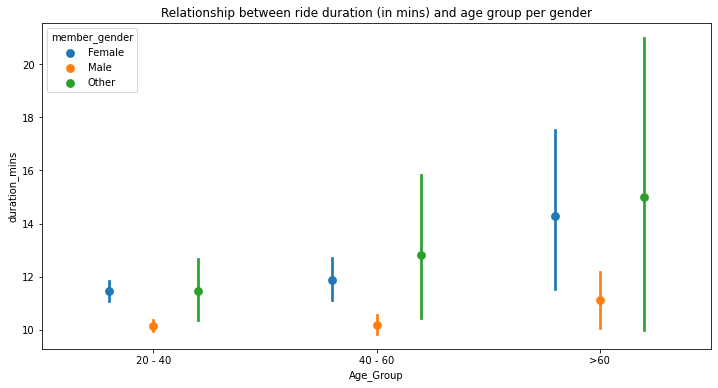

In [8]:
new_sample = data.sample(n=10000, random_state=42)
# Remove outliers to better explore the interactions
new_sample_without_outlier = new_sample[new_sample['duration_mins'] <= 90]

fig, ax = plt.subplots(figsize = [12,6])
sb.pointplot(data = new_sample_without_outlier, x = 'Age_Group', y = 'duration_mins', hue = 'member_gender',
             palette = sb.color_palette('tab10'), linestyles = '', dodge = 0.4,
            order=['20 - 40', '40 - 60', '>60'])
plt.title("Relationship between ride duration (in mins) and age group per gender")

In [9]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 635386 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
